In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [3]:
# Reading the data from file
tyt = pd.read_csv('ToyotaCorolla.csv', encoding= 'latin1' )

In [4]:
# dropping index named column
tyt2=tyt.drop(['Ind'],axis=1)

In [5]:
# rearranging the data
tyt3 = tyt2[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
tyt3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
tyt3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
tyt3.describe()


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
tyt3.info()
# shows no null values. all looks good. 
# we have no category variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [51]:
tyt3.isnull().sum()  # No Null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
# checking unique values in each column

In [83]:
tyt3["Doors"].unique()

array([3, 5, 4, 2], dtype=int64)

In [82]:
#"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"
tyt3["Gears"].unique()

array([5, 6, 3, 4], dtype=int64)

In [84]:
tyt3["HP"].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [85]:
tyt3["cc"].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [ ]:
# though we have continuous variables, cylinders, doors hp, cc are discrete variable
# we have choice to treat them as contineuos 
# or treat them as categorical
# from above unique values it is not advisable to use somany dummy variables 
#so we take them as continuous

In [52]:
# plotting correlation to see the colinearity
tyt3.corr()
# there seems no colinearity between input variables

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


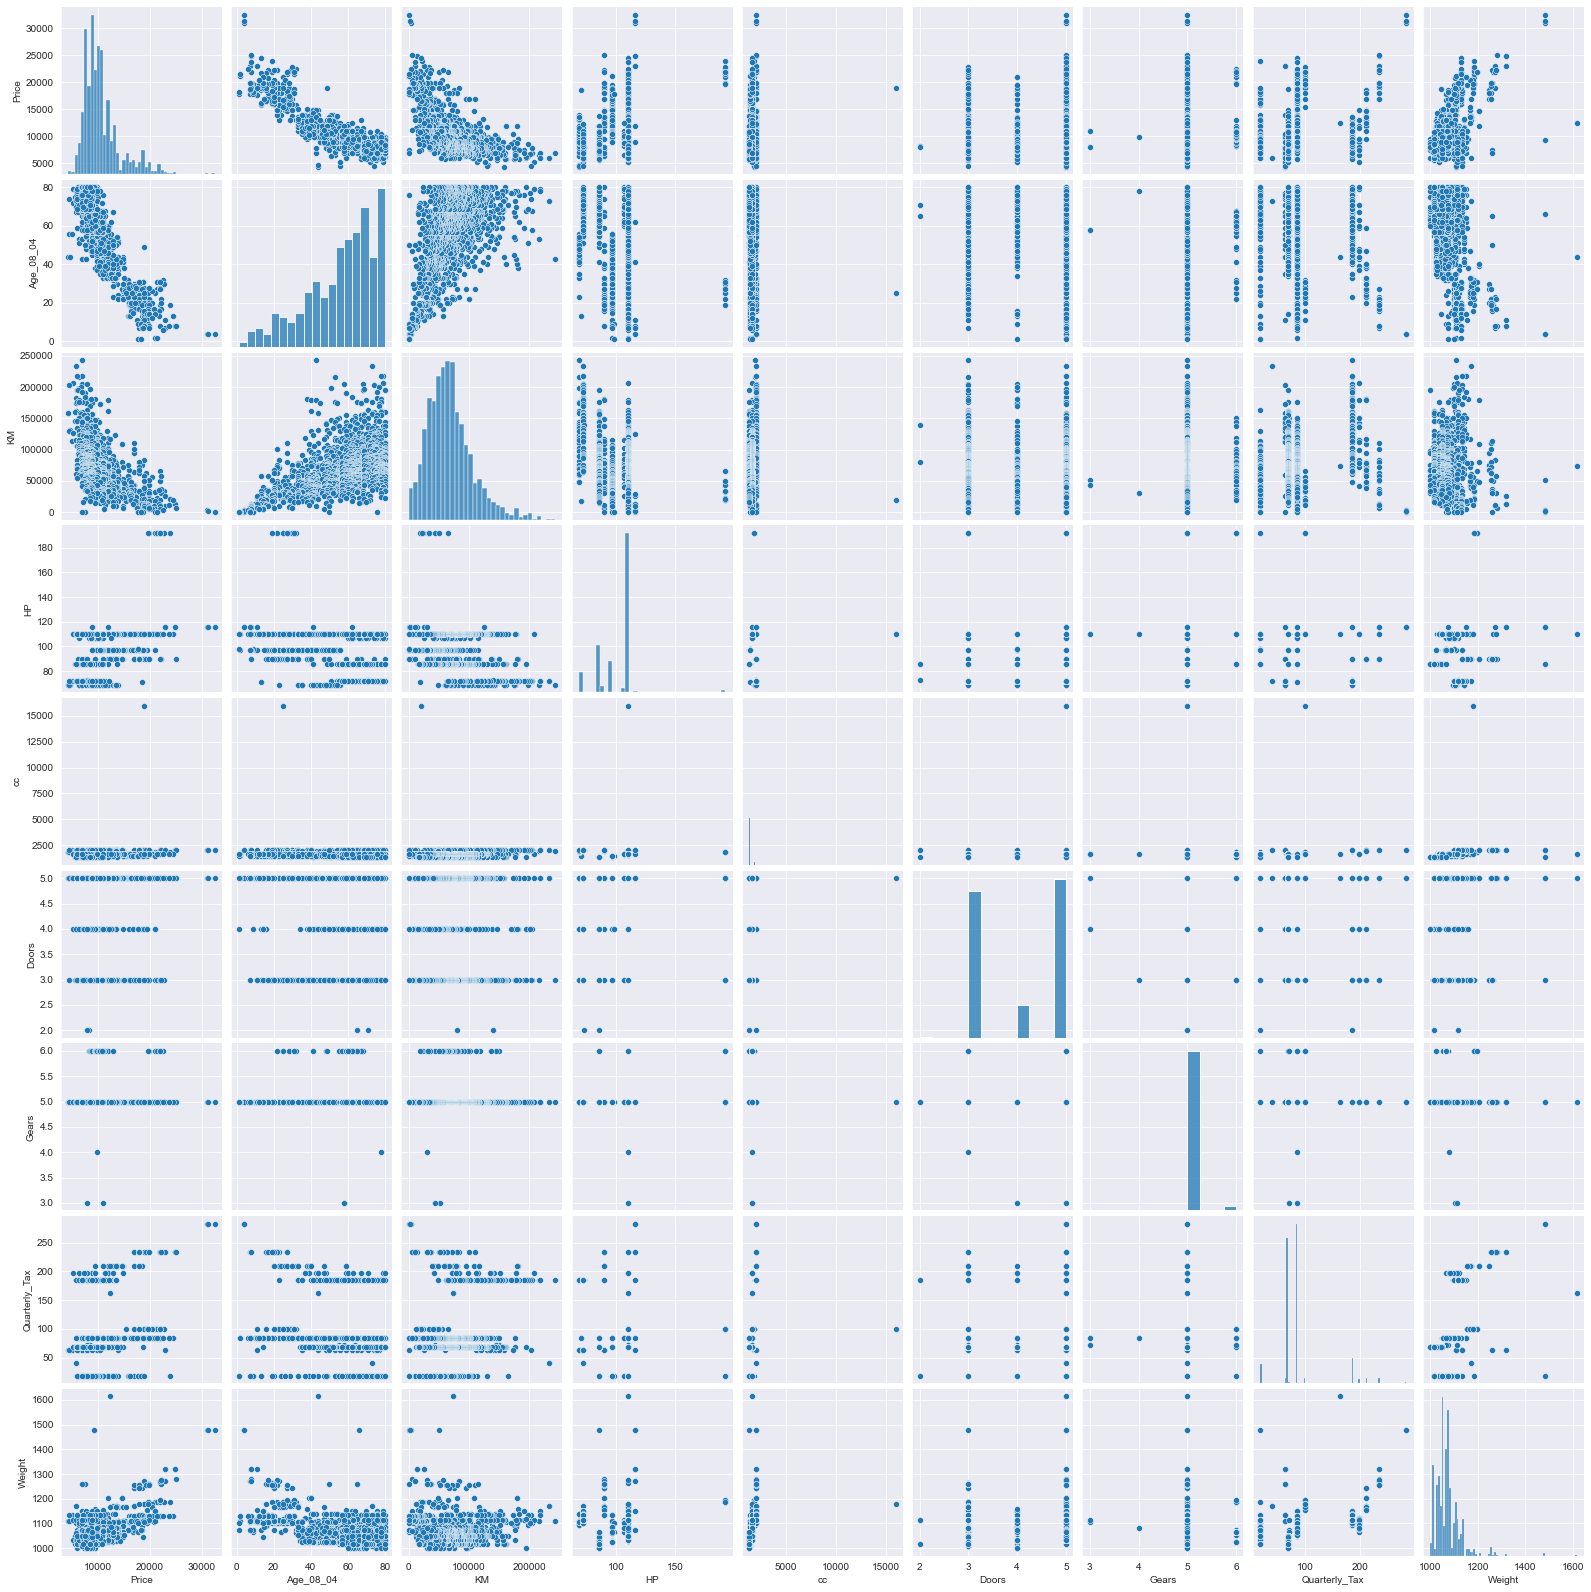

In [53]:
#plotting pair plot to examine the variables

sns.set_style(style='darkgrid')
sns.pairplot(tyt3)

In [9]:
#Building simple  model
# price is target value
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt3).fit()

In [10]:
model.summary()
#Rsquare seeems  good but let us anayse it further
# the p value for cc and doors is more than 0.05 which means they have no affect on price
# as cc and hp are related we will build two models sepeartely and check vif
# but let us examine futher

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        17:56:12   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Checking for partial correlation

In [11]:
lr_A = smf.ols('Price~Age_08_04',data=tyt3).fit()
print(lr_A.tvalues[1], '\n', lr_A.pvalues[1])

-68.97826654693505 
 0.0


In [12]:
lr_K = smf.ols('Price~KM',data=tyt3).fit()
print(lr_K.tvalues[1], '\n', lr_K.pvalues[1])

-26.267601485692254 
 1.7579130983389984e-124


In [13]:
lr_H = smf.ols('Price~HP',data=tyt3).fit()
print(lr_H.tvalues[1], '\n', lr_H.pvalues[1])

12.567861917945544 
 1.9262337998153598e-34


In [14]:
lr_C = smf.ols('Price~cc',data=tyt3).fit()
print(lr_C.tvalues[1], '\n', lr_C.pvalues[1])

4.824821995974149 
 1.5508075165402594e-06


In [15]:
lr_D = smf.ols('Price~Doors',data=tyt3).fit()
print(lr_D.tvalues[1], '\n', lr_D.pvalues[1])

7.141657230387254 
 1.4612365709962752e-12


In [16]:
lr_G = smf.ols('Price~Gears',data=tyt3).fit()
print(lr_G.tvalues[1], '\n', lr_G.pvalues[1])

2.3944011308407016 
 0.016775285160988328


In [17]:
lr_Q = smf.ols('Price~Quarterly_Tax',data=tyt3).fit()
print(lr_Q.tvalues[1], '\n', lr_Q.pvalues[1])

8.507487438042057 
 4.407393281473614e-17


In [18]:
lr_W = smf.ols('Price~Weight',data=tyt3).fit()
print(lr_W.tvalues[1], '\n', lr_W.pvalues[1])

27.045855350415486 
 1.6304869326497253e-130


In [20]:
# from above only gears seems  no effect on price 
# but lets keep and check vif

In [21]:
rs_a = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt3).fit().rsquared
rs_k = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt3).fit().rsquared
rs_h = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=tyt3).fit().rsquared
rs_c = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=tyt3).fit().rsquared
rs_d = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tyt3).fit().rsquared
rs_g = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=tyt3).fit().rsquared
rs_q = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=tyt3).fit().rsquared
rs_w = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=tyt3).fit().rsquared

vif_a = 1/(1-rs_a)
vif_k = 1/(1-rs_k)
vif_h = 1/(1-rs_h)
vif_c = 1/(1-rs_c)
vif_d = 1/(1-rs_d)
vif_g = 1/(1-rs_g)
vif_q = 1/(1-rs_q)
vif_w = 1/(1-rs_w)


In [22]:
d1 = {'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_a,vif_k, vif_h, vif_c ,vif_d,vif_g ,vif_q ,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [71]:
#the vif scores are within limit 
# so we can not ignore any variable
# we also check for colinearity of cc and hp in later stage

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


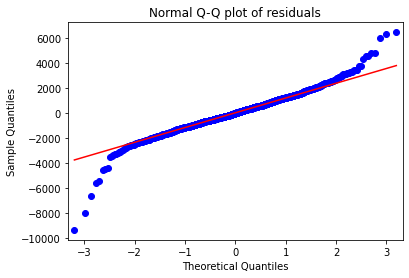

In [72]:
# Checking for any outliers
# some values seems to be not aligning with the data 
# lets examine the data further
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [73]:
#finding out values where the data is far from line 
# many data points  seems way far from the rest of data
lowerr = list(np.where(model.resid< -4000))

In [74]:
higherr = list(np.where(model.resid>4000))

In [75]:
# lets standardise the values

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

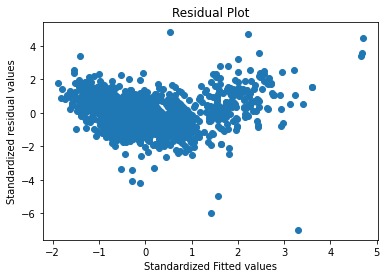

In [76]:
#Checking for Homoscedasticity 
# the residuals are spread randomly

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

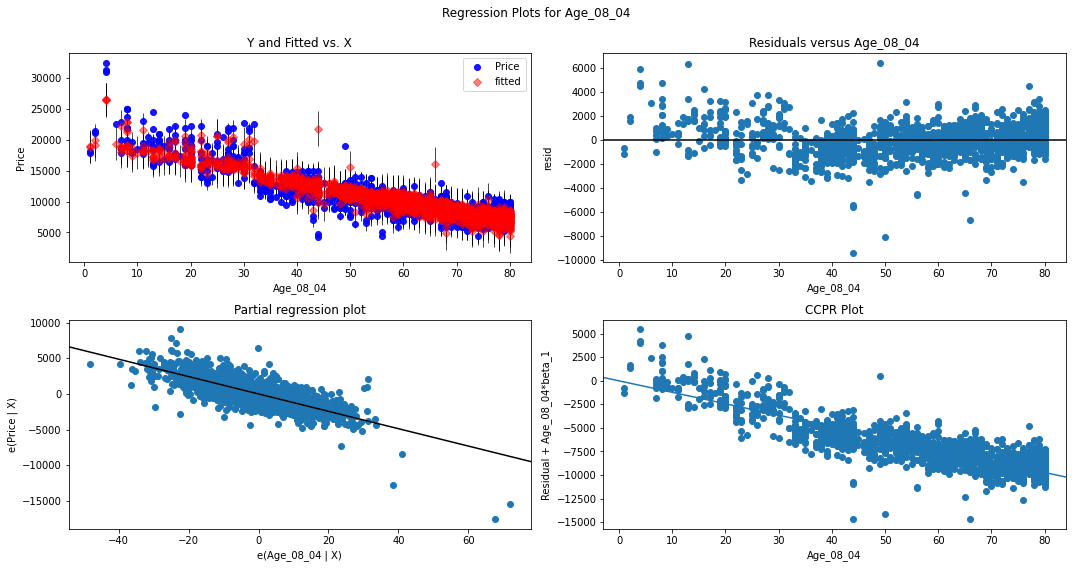

In [77]:
# partial regressions for checking of the relation
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

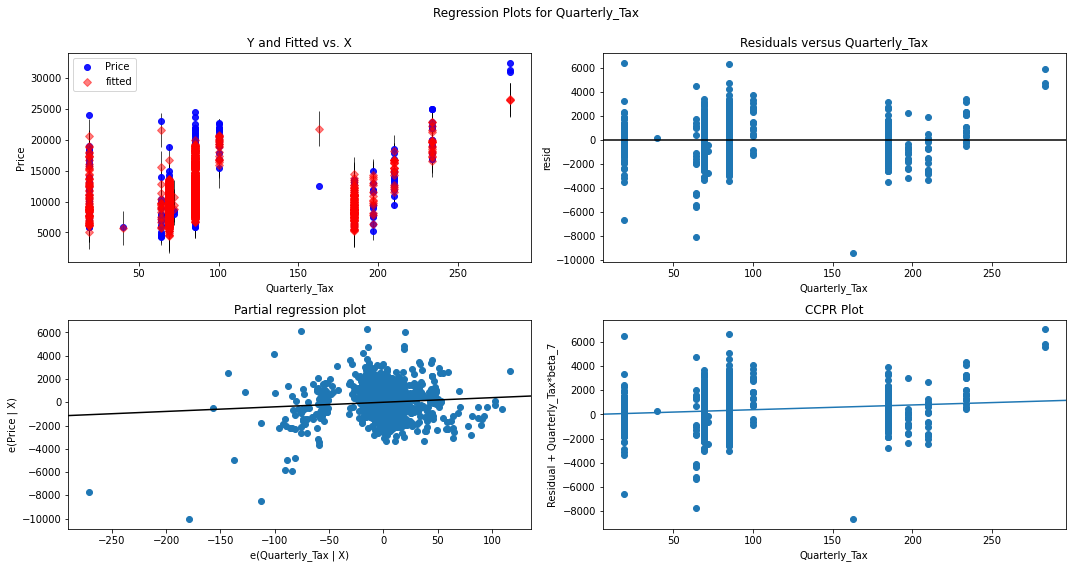

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

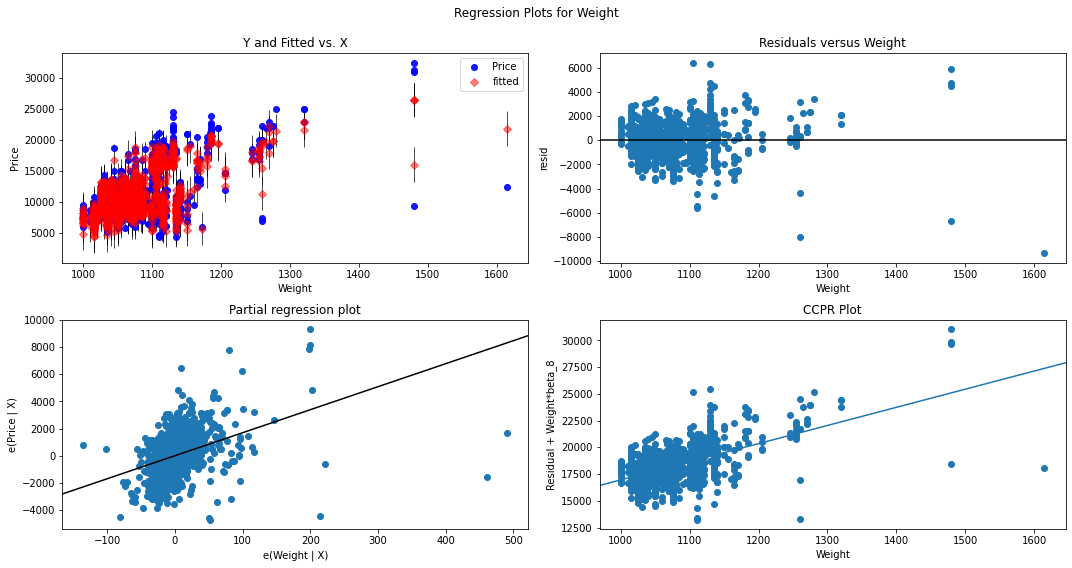

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [81]:
# from above graphs only doors seems to have no effect

In [82]:

#from sklearn.model_selection import train_test_split
#X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=7)
#as the data points are very less lets ignore the this

In [83]:
# Finding cooks distance to check influencing points
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

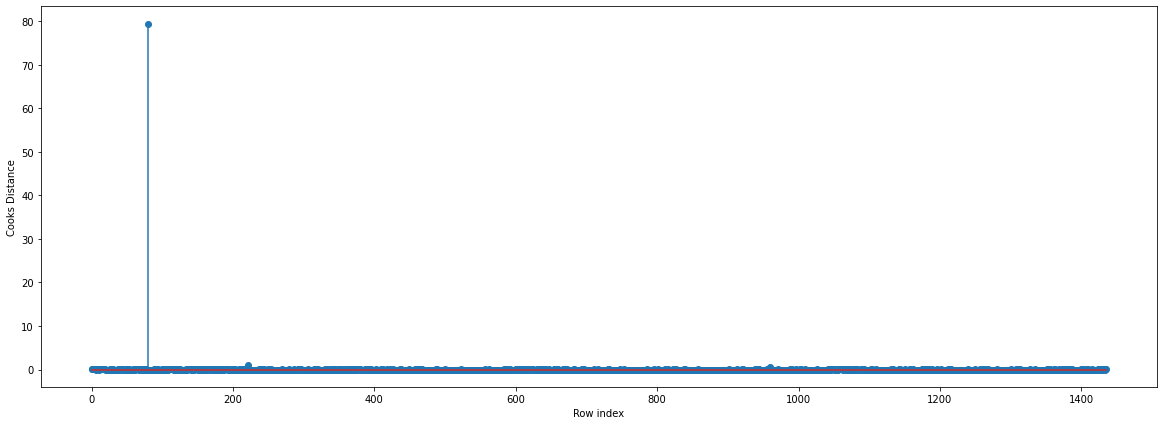

In [84]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tyt3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [85]:
# removing the high distnace points
(np.argmax(c),np.max(c))

(80, 79.52010624132545)

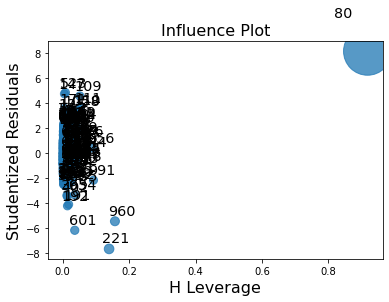

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [87]:
# point 80 is definitely influencing 


In [88]:
tyt.shape

(1436, 38)

In [89]:
k = tyt3.shape[1]
n = tyt3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
round(leverage_cutoff,3)

0.021

In [90]:
# deviating points from at lower end 
lowerr

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [91]:
# deviating points at higher end
higherr

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [92]:
tyt3[tyt3.index.isin([80, 191, 192, 221, 393, 402, 601, 654, 960,109,  110,  111,  125,  147,  171,  523, 1058])]
# though  they are non null values their magnitude not fitting the general range so we can remove them
# so that theywill not drag the regression towards them

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
125,21750,16,36000,110,1600,5,5,85,1130
147,24500,13,19988,110,1600,5,5,85,1130
171,23750,8,11000,110,1600,5,5,85,1130
191,4350,44,158320,69,1800,5,5,64,1110
192,4750,44,131273,69,1800,5,5,64,1110
221,12450,44,74172,110,1600,5,5,163,1615


In [93]:
tyt3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [94]:
#from above comparison points 80, 109, 601 are influencing as they have very different values from the rest

In [95]:
#lets start building model

In [96]:
newdata=tyt3.copy()

In [97]:
#Removing the influencing pints are outliers

In [98]:
newdata2 =newdata.drop(newdata.index[[80, 191, 192, 221, 393, 402, 601, 654, 960,109,  110,  111,  125,  147,  171,  523, 1058]],axis=0)


In [99]:
# resetting the index
newdata3 =newdata2.reset_index(drop=True)

In [100]:
newdata3.shape

(1419, 9)

In [101]:
newdata3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [102]:
newdata3.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.888004,-0.569298,0.306577,0.156173,0.179850,0.069436,0.174511,0.598831
Age_08_04,-0.888004,1.000000,0.501921,-0.151050,-0.122635,-0.138514,-0.007218,-0.177174,-0.494273
KM,-0.569298,0.501921,1.000000,-0.322349,0.309877,-0.037824,0.015039,0.311416,0.002323
HP,0.306577,-0.151050,-0.322349,1.000000,0.060856,0.095840,0.210973,-0.326423,0.098807
cc,0.156173,-0.122635,0.309877,0.060856,1.000000,0.120427,0.043315,0.689344,0.715330
Doors,0.179850,-0.138514,-0.037824,0.095840,0.120427,1.000000,-0.160301,0.099853,0.333630
Gears,0.069436,-0.007218,0.015039,0.210973,0.043315,-0.160301,1.000000,-0.004689,0.030932
Quarterly_Tax,0.174511,-0.177174,0.311416,-0.326423,0.689344,0.099853,-0.004689,1.000000,0.661224
Weight,0.598831,-0.494273,0.002323,0.098807,0.715330,0.333630,0.030932,0.661224,1.000000


In [103]:
# Defining inputs and targets
# your choice
targets=newdata3['Price']
inputs = newdata3.drop(['Price'], axis =1)


In [104]:
inputs.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [129]:
# as data is ready. lets build the model

Final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata3).fit()

In [130]:
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1465.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        18:51:02   Log-Likelihood:                -11985.
No. Observations:                1419   AIC:                         2.399e+04
Df Residuals:                    1410   BIC:                         2.404e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.633e+04   1429.006    -11.426      0.000   -1.91e+04   -1.35e+04
Age_08_04      -110.5959      2.351    -47.034      0.000    -115.209    -105.983
KM               -0.0170      0.001    -15.269      0.000      -0.019      -0.015
HP               29.9925      2.617     11.460      0.000      24.859      35.126
cc               -3.2811      0.293    -11.210      0.000      -3.855      -2.707
Doors          -136.1212     35.149     -3.873      0.000    -205.070     -67.172
Gears           528.7767    166.412      3.178      0.002     202.335     855.218
Quarterly_Tax     1.4288      1.345      1.062      0.288      -1.210       4.068
Weight           31.9803      1.356     23.580      0.000      29.320      34.641
==============================================================================
Omnibus:                        8.622   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.825
Skew:                           0.115   Prob(JB):                      0.00735
Kurtosis:                       3.336   Cond. No.                     3.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
f_model_influence = Final_model.get_influence()
(c, _) = f_model_influence.cooks_distance

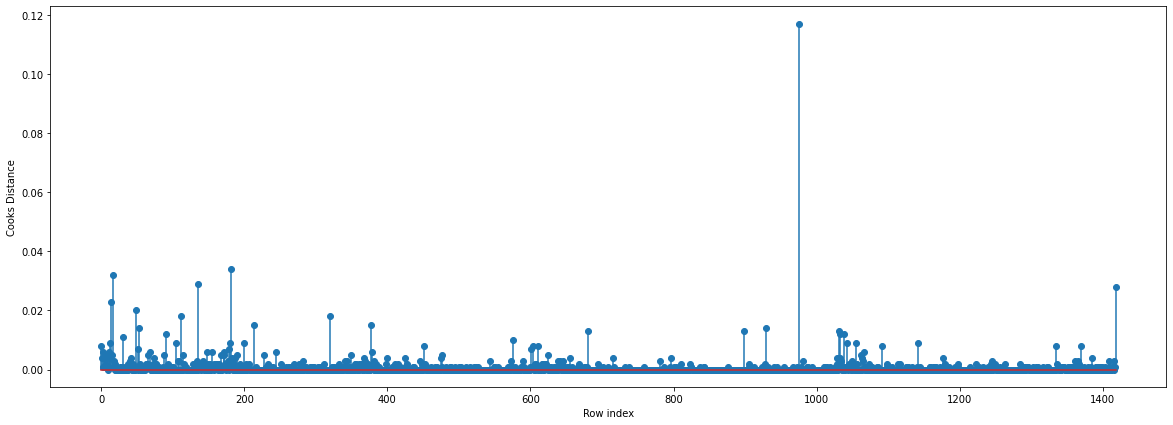

In [65]:
# checking the data for outliers and influencers

fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(newdata3)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [66]:
# the cooks distance is within limits


In [106]:
# as discussed above  let us build model with and without cc and hp 
# so by removing it let us check the model

In [122]:
# with hp without cc
Final_model2 = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=newdata3).fit()
Final_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1522.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        18:34:44   Log-Likelihood:                -12045.
No. Observations:                1419   AIC:                         2.411e+04
Df Residuals:                    1411   BIC:                         2.415e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.26e+04   1449.840     -8.690      0.000   -1.54e+04   -9754.399
Age_08_04      -115.1294      2.417    -47.642      0.000    -119.870    -110.389
KM               -0.0201      0.001    -17.943      0.000      -0.022      -0.018
HP               20.5402      2.585      7.947      0.000      15.470      25.610
Doors           -71.6334     36.174     -1.980      0.048    -142.594      -0.673
Gears           653.0192    173.223      3.770      0.000     313.218     992.821
Quarterly_Tax    -4.3128      1.298     -3.323      0.001      -6.859      -1.767
Weight           24.6774      1.241     19.885      0.000      22.243      27.112
==============================================================================
Omnibus:                        5.070   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                5.599
Skew:                           0.072   Prob(JB):                       0.0608
Kurtosis:                       3.272   Cond. No.                     3.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
# with cc without hp
Final_model3 = smf.ols('Price~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata3).fit()
Final_model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1515.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        18:34:35   Log-Likelihood:                -12048.
No. Observations:                1419   AIC:                         2.411e+04
Df Residuals:                    1411   BIC:                         2.415e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.912e+04   1471.651    -12.994      0.000    -2.2e+04   -1.62e+04
Age_08_04      -109.6832      2.456    -44.656      0.000    -114.501    -104.865
KM               -0.0201      0.001    -17.828      0.000      -0.022      -0.018
cc               -2.2004      0.290     -7.598      0.000      -2.768      -1.632
Doors          -108.8095     36.652     -2.969      0.003    -180.707     -36.912
Gears           986.8781    168.836      5.845      0.000     655.682    1318.074
Quarterly_Tax    -6.5221      1.205     -5.413      0.000      -8.885      -4.159
Weight           34.4004      1.400     24.568      0.000      31.654      37.147
==============================================================================
Omnibus:                       30.931   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.081
Skew:                           0.128   Prob(JB):                     4.03e-13
Kurtosis:                       3.949   Cond. No.                     3.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# from final model 2 and 3 it is clear that the HP and cc has same influence and same AIC values 
# but over all r square values reduced. so we use both the parameters
# now we will check for doors and gears

In [123]:
# removing doors
Final_model4 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=newdata3).fit()
Final_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1656.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        18:38:22   Log-Likelihood:                -11992.
No. Observations:                1419   AIC:                         2.400e+04
Df Residuals:                    1411   BIC:                         2.404e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.568e+04   1426.185    -10.994      0.000   -1.85e+04   -1.29e+04
Age_08_04      -111.4437      2.353    -47.367      0.000    -116.059    -106.828
KM               -0.0172      0.001    -15.362      0.000      -0.019      -0.015
HP               29.3053      2.624     11.168      0.000      24.158      34.453
cc               -3.0956      0.290    -10.668      0.000      -3.665      -2.526
Gears           656.2654    163.930      4.003      0.000     334.692     977.839
Quarterly_Tax     1.8325      1.348      1.359      0.174      -0.812       4.477
Weight           30.0803      1.271     23.673      0.000      27.588      32.573
==============================================================================
Omnibus:                        6.168   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.548
Skew:                           0.108   Prob(JB):                       0.0378
Kurtosis:                       3.254   Cond. No.                     3.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# Removing gears
Final_model5 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=newdata3).fit()
Final_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1662.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        18:39:05   Log-Likelihood:                -11990.
No. Observations:                1419   AIC:                         2.400e+04
Df Residuals:                    1411   BIC:                         2.404e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.394e+04   1218.461    -11.437      0.000   -1.63e+04   -1.15e+04
Age_08_04      -110.5783      2.359    -46.876      0.000    -115.206    -105.951
KM               -0.0167      0.001    -15.015      0.000      -0.019      -0.015
HP               31.9901      2.549     12.552      0.000      26.991      36.990
cc               -3.3430      0.293    -11.411      0.000      -3.918      -2.768
Doors          -158.2147     34.565     -4.577      0.000    -226.019     -90.411
Quarterly_Tax     1.6851      1.347      1.251      0.211      -0.958       4.328
Weight           32.1727      1.359     23.670      0.000      29.506      34.839
==============================================================================
Omnibus:                       10.232   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               13.139
Skew:                           0.087   Prob(JB):                      0.00140
Kurtosis:                       3.438   Cond. No.                     3.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# removing gears improved the r squared alue but removing doors reduced the r squared value
# but both have same adjusted r square 

In [125]:
# removing both doors and gears
Final_model6 = smf.ols('Price~Age_08_04+KM+cc+Quarterly_Tax+Weight',data=newdata3).fit()
Final_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     2040.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        18:42:43   Log-Likelihood:                -12073.
No. Observations:                1419   AIC:                         2.416e+04
Df Residuals:                    1413   BIC:                         2.419e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.335e+04   1242.586    -10.744      0.000   -1.58e+04   -1.09e+04
Age_08_04      -110.4966      2.487    -44.427      0.000    -115.376    -105.618
KM               -0.0200      0.001    -17.489      0.000      -0.022      -0.018
cc               -1.9947      0.291     -6.854      0.000      -2.566      -1.424
Quarterly_Tax    -6.4688      1.213     -5.332      0.000      -8.849      -4.089
Weight           32.9673      1.319     25.000      0.000      30.380      35.554
==============================================================================
Omnibus:                       46.233   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.854
Skew:                           0.166   Prob(JB):                     1.26e-22
Kurtosis:                       4.263   Cond. No.                     3.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# removing both has reduced the r squared value 
# from the above models it is clear that all factors have some influence on the price except gears
# ao it is better to keep all parameters.
# the final model will be 

In [127]:
Final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata3).fit()

In [128]:
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1465.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        18:50:17   Log-Likelihood:                -11985.
No. Observations:                1419   AIC:                         2.399e+04
Df Residuals:                    1410   BIC:                         2.404e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.633e+04   1429.006    -11.426      0.000   -1.91e+04   -1.35e+04
Age_08_04      -110.5959      2.351    -47.034      0.000    -115.209    -105.983
KM               -0.0170      0.001    -15.269      0.000      -0.019      -0.015
HP               29.9925      2.617     11.460      0.000      24.859      35.126
cc               -3.2811      0.293    -11.210      0.000      -3.855      -2.707
Doors          -136.1212     35.149     -3.873      0.000    -205.070     -67.172
Gears           528.7767    166.412      3.178      0.002     202.335     855.218
Quarterly_Tax     1.4288      1.345      1.062      0.288      -1.210       4.068
Weight           31.9803      1.356     23.580      0.000      29.320      34.641
==============================================================================
Omnibus:                        8.622   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.825
Skew:                           0.115   Prob(JB):                      0.00735
Kurtosis:                       3.336   Cond. No.                     3.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""